In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_excel("Dados2.xlsx")
data.head()

,Febre,Dor de garganta,Coceira no nariz\n e garganta,Dificuldade \npara respirar,Possível diagnóstico
0,8,0,0,0,COVID
1,7,5,0,0,COVID
2,10,8,7,0,COVID
3,10,9,10,9,COVID
4,0,5,0,0,Resfriado


In [4]:
# acrescenta coluna de index
data['index'] = data.index
data

,Febre,Dor de garganta,Coceira no nariz\n e garganta,Dificuldade \npara respirar,Possível diagnóstico,index
0,8,0,0,0,COVID,0
1,7,5,0,0,COVID,1
2,10,8,7,0,COVID,2
3,10,9,10,9,COVID,3
4,0,5,0,0,Resfriado,4
5,0,8,7,0,Resfriado,5
6,0,10,10,9,COVID,6
7,0,0,4,0,Rinite Alérgica,7
8,0,0,4,8,COVID,8
9,0,0,0,7,COVID,9


In [5]:
# trasforma os diagnotiscos em numeros
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
doencas = le.fit(data['Possível diagnóstico'])
print(doencas.classes_)
doencas_numeros = le.transform(data['Possível diagnóstico'])
print(doencas_numeros)
print(le.inverse_transform(doencas_numeros))

['COVID' 'Resfriado' 'Rinite Alérgica' 'Sem Diagnóstico']
[0 0 0 0 1 1 0 2 0 0 3 0 1 0 0 0]
['COVID' 'COVID' 'COVID' 'COVID' 'Resfriado' 'Resfriado' 'COVID'
 'Rinite Alérgica' 'COVID' 'COVID' 'Sem Diagnóstico' 'COVID' 'Resfriado'
 'COVID' 'COVID' 'COVID']


In [6]:
# tansformas os numeros de diagnosticos em um dataframe
doencas_numeros_df = pd.DataFrame(doencas_numeros)
doencas_numeros_df['index'] = doencas_numeros_df.index
doencas_numeros_df

,0,index
0,0,0
1,0,1
2,0,2
3,0,3
4,1,4
5,1,5
6,0,6
7,2,7
8,0,8
9,0,9


In [7]:
# mescla o df original com o df de diagnosticos em numeros
data3 = data.merge(doencas_numeros_df, on='index')
data3.rename(columns={0:'Diagnostico_num', 'Possível diagnóstico' : 'Diagnostico'}, inplace=True)
data3.drop('index',axis=1, inplace=True)
data3

,Febre,Dor de garganta,Coceira no nariz\n e garganta,Dificuldade \npara respirar,Diagnostico,Diagnostico_num
0,8,0,0,0,COVID,0
1,7,5,0,0,COVID,0
2,10,8,7,0,COVID,0
3,10,9,10,9,COVID,0
4,0,5,0,0,Resfriado,1
5,0,8,7,0,Resfriado,1
6,0,10,10,9,COVID,0
7,0,0,4,0,Rinite Alérgica,2
8,0,0,4,8,COVID,0
9,0,0,0,7,COVID,0


In [8]:
X = data3.drop(['Diagnostico', 'Diagnostico_num'], axis=1)
y = data3['Diagnostico_num']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0)

#arvere = DecisionTreeRegressor(max_depth=8, random_state=0)
#arvore = DecisionTreeRegressor(min_samples_leaf=21, random_state=0)
arvore = DecisionTreeRegressor()
arvore.fit(Xtr, ytr)

p = arvore.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

1.2747548783981961

[Text(0.6666666666666666, 0.9, 'Febre  <= 4.5\nsquared_error = 1.109\nsamples = 8\nvalue = 0.875'),
 Text(0.5555555555555556, 0.7, 'Dor de garganta <= 3.5\nsquared_error = 1.04\nsamples = 5\nvalue = 1.4'),
 Text(0.3333333333333333, 0.5, 'Febre  <= 1.5\nsquared_error = 0.667\nsamples = 3\nvalue = 2.0'),
 Text(0.2222222222222222, 0.3, 'Coceira no nariz\n e garganta <= 2.0\nsquared_error = 0.25\nsamples = 2\nvalue = 2.5'),
 Text(0.1111111111111111, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.4444444444444444, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.7777777777777778, 0.5, 'Dificuldade \npara respirar  <= 3.0\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.6666666666666666, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.8888888888888888, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.7777777777777778, 0.7, 'squared_error = 0.0\

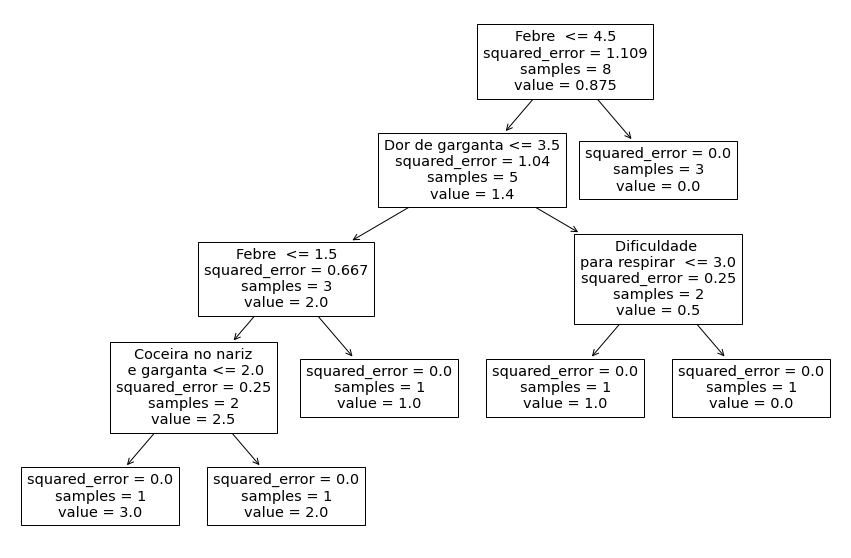

In [10]:
from matplotlib import pylab
from pylab import *
pylab.figure(figsize=(15,10))
plot_tree(arvore, feature_names=Xtr.columns)

[Text(0.6666666666666666, 0.9, 'Febre  <= 4.5\nsquared_error = 1.109\nsamples = 8\nvalue = 0.875'),
 Text(0.5555555555555556, 0.7, 'Dor de garganta <= 3.5\nsquared_error = 1.04\nsamples = 5\nvalue = 1.4'),
 Text(0.3333333333333333, 0.5, 'Febre  <= 1.5\nsquared_error = 0.667\nsamples = 3\nvalue = 2.0'),
 Text(0.2222222222222222, 0.3, 'Coceira no nariz\n e garganta <= 2.0\nsquared_error = 0.25\nsamples = 2\nvalue = 2.5'),
 Text(0.1111111111111111, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.4444444444444444, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.7777777777777778, 0.5, 'Dificuldade \npara respirar  <= 3.0\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.6666666666666666, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.8888888888888888, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.7777777777777778, 0.7, 'squared_error = 0.0\

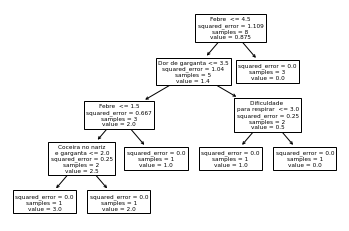

In [11]:
plot_tree(arvore, feature_names=Xtr.columns)

[Text(0.6666666666666666, 0.9, 'X[0] <= 4.5\nsquared_error = 1.109\nsamples = 8\nvalue = 0.875'),
 Text(0.5555555555555556, 0.7, 'X[1] <= 3.5\nsquared_error = 1.04\nsamples = 5\nvalue = 1.4'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nsquared_error = 0.667\nsamples = 3\nvalue = 2.0'),
 Text(0.2222222222222222, 0.3, 'X[2] <= 2.0\nsquared_error = 0.25\nsamples = 2\nvalue = 2.5'),
 Text(0.1111111111111111, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.4444444444444444, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 3.0\nsquared_error = 0.25\nsamples = 2\nvalue = 0.5'),
 Text(0.6666666666666666, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(0.8888888888888888, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.7777777777777778, 0.7, 'squared_error = 0.0\nsamples = 3\nvalue = 0.0')]

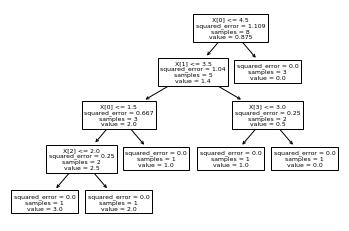

In [12]:
from sklearn import tree
tree.plot_tree(arvore)